In [17]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../src')

In [18]:
dataset = load_dataset("csv", data_files="../data/pii_parsed_43k.csv", split="train")
dataset = dataset.remove_columns('Unnamed: 0')

In [25]:
print(dataset)
print(dataset.features)

Dataset({
    features: ['document', 'full_text', 'tokens', 'trailing_whitespace', 'labels'],
    num_rows: 43501
})
{'document': Value(dtype='int64', id=None), 'full_text': Value(dtype='string', id=None), 'tokens': Value(dtype='string', id=None), 'trailing_whitespace': Value(dtype='string', id=None), 'labels': Value(dtype='string', id=None)}


{'document': Value(dtype='int64', id=None),
 'full_text': Value(dtype='string', id=None),
 'tokens': Value(dtype='string', id=None),
 'trailing_whitespace': Value(dtype='string', id=None),
 'labels': Value(dtype='string', id=None)}

In [8]:
ds = pd.DataFrame.from_dict(dataset[:])
ds.head()
# ds = dataset[:]
# type(ds)

,Unnamed: 0,document,full_text,tokens,trailing_whitespace,labels
0,0,0,A student's assessment was found on device bea...,"['a', 'student', ""'"", 's', 'assessment', 'was'...","[True, False, False, True, True, True, True, T...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,1,1,"Dear Omer, as per our records, your license 78...","['dear', 'om', '##er', ',', 'as', 'per', 'our'...","[True, False, True, True, True, True, True, Tr...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',..."
2,2,2,Kattie could you please share your recomndatio...,"['kat', '##tie', 'could', 'you', 'please', 'sh...","[False, True, True, True, True, True, True, Fa...","['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O',..."
3,3,3,Emergency supplies in 16356 need a refill. Use...,"['emergency', 'supplies', 'in', '1635', '##6',...","[True, True, True, False, True, True, True, Fa...","['O', 'O', 'O', 'B-STREET_ADDRESS', 'I-STREET_..."
4,4,4,"The 88 old child at 5862, has showcased an unu...","['the', '88', 'old', 'child', 'at', '58', '##6...","[True, True, True, True, True, False, False, F...","['O', 'O', 'O', 'O', 'O', 'B-STREET_ADDRESS', ..."


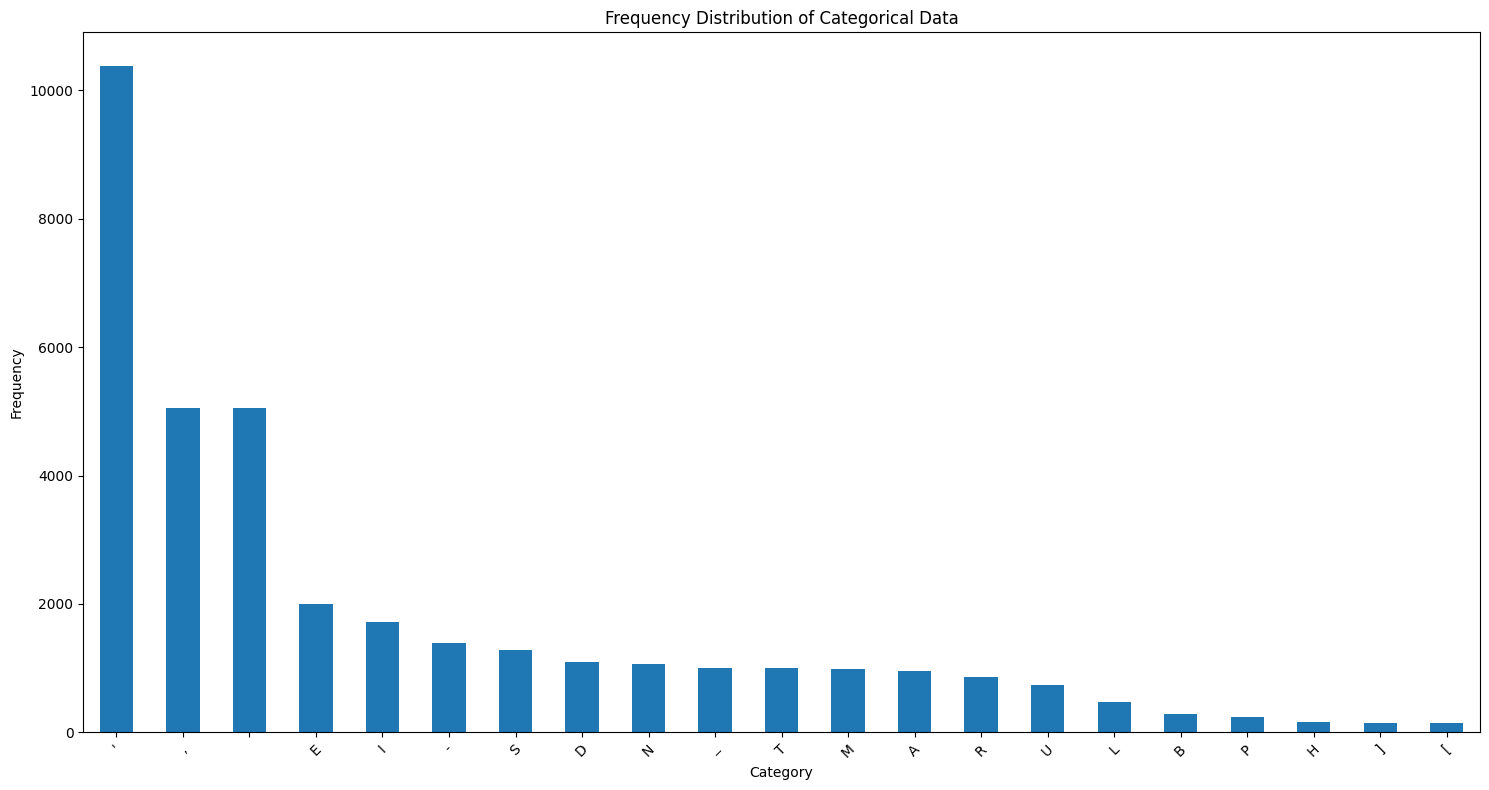

In [51]:
df = df[df['labels'] != 'O']

import matplotlib.pyplot as plt
frequency = df['labels'].value_counts()
plt.figure(figsize=(15, 8))

# Plot the frequency distribution
frequency.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Data')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout() 
plt.show()